Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


load the top 10 data sets

In [3]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


load the last 10 datasets

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Above is the list of all columns name/attribute

In [5]:
df.shape

(32560, 15)

our data sets ha 32560 rows and 15 columns

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Our dataset has object and numberical both type of data.

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


Our dataset does not contain any null values. Let's see the same thing with the help of heatmap.

<AxesSubplot:>

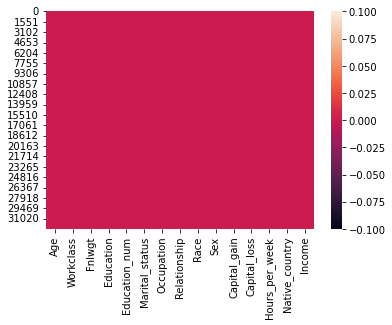

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

here we can see that Rducation_num is not neccessary. so should drop this column

In [10]:
#drop education_num
df.drop("Education_num", axis=1, inplace=True)

In [11]:
categorical_col=[]
for i in df:
    if df[i].dtypes=='object':
        categorical_col.append(i)
        print(df[i].value_counts(),"\n")
        
print("List:" ,categorical_col)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

We can see "?" in 3 columns Workclass, Occupation and Native_country. We will replace it with mode of that particular column. Also we can see some values in some columns are repeated with different labeling, let's make some meaningful changes to data.

In [12]:
#replacing ? value
df['Workclass']=df['Workclass'].str.replace('?',"Private")
df['Occupation']=df['Occupation'].str.replace('?',"Prof-specialty")
df['Native_country']=df['Native_country'].str.replace('?',"United-States")

In [13]:
# for Column workclass we have 3 types of government employees, we can club it together.
df.Workclass=df.Workclass.replace(to_replace=['Local-gov','State-gov','Federal-gov'],value="Government", regex=True)

In [14]:
#lets work on Education column now
df.Education=df.Education.replace(to_replace=['10th','7th-8th','9th','5th-6th','1st-4th','Preschool'],value="School", regex=True)
df.Education=df.Education.replace(to_replace=['HS-grad','Some-college','11th','12th'],value="College", regex=True)
df.Education=df.Education.replace(to_replace=['Assoc-voc','Assoc-acdm'],value="Associates", regex=True)

In [15]:
#Lets work on Marital_status column now
df.Marital_status=df.Marital_status.replace(to_replace=['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],value="Married", regex=True)
df.Marital_status=df.Marital_status.replace(to_replace=['Never-married'],value="Single", regex=True)
df.Marital_status=df.Marital_status.replace(to_replace=['Divorced','Separated','Widowed'],value="Other", regex=True)

# Let's do Visualization:

We will remove Native_country from cat_col list for further analysis.

In [16]:
categorical_col.remove("Native_country")

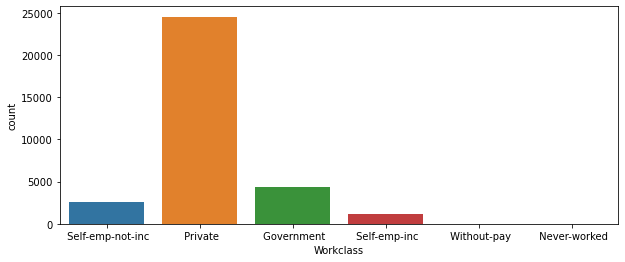

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(df["Workclass"])
plt.show()

above figure, privte employees is higher percentage than rest of sectore.

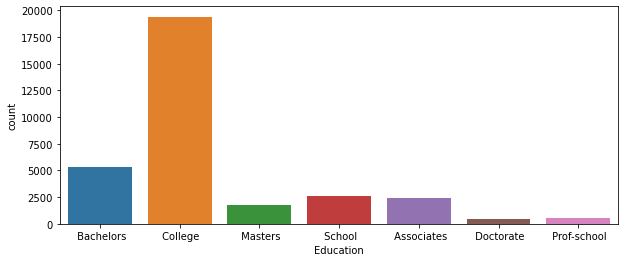

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df["Education"])
plt.show()

college studetnts is higher than rest of the education sector.

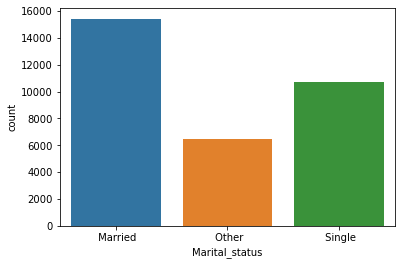

In [19]:
plt.figure()
sns.countplot(df["Marital_status"])
plt.show()

above figure is high percentage of married person

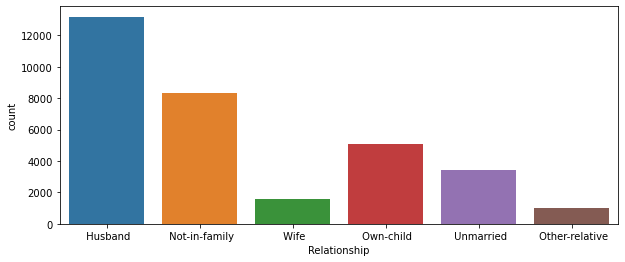

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(df["Relationship"])
plt.show()

husband is more than rest of all

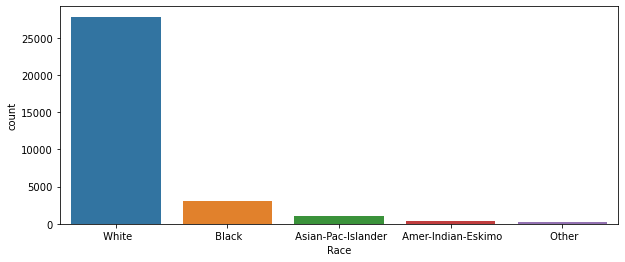

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(df["Race"])
plt.show()

White racer is more than black racer

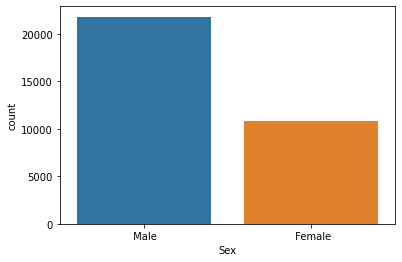

In [22]:
plt.figure()
sns.countplot(df["Sex"])
plt.show()

Male is higher than Female 

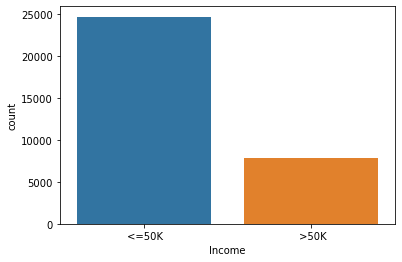

In [23]:
plt.figure()
sns.countplot(df["Income"])
plt.show()

The income is more than 50k are higher than less 50k

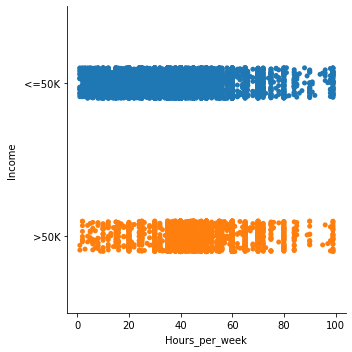

In [24]:
sns.catplot(x='Hours_per_week',y='Income',data=df,kind='strip')

for income <=50k hours per week are majorly between 0 to 60 whereas for >50k hours per week are between 30 to 60.

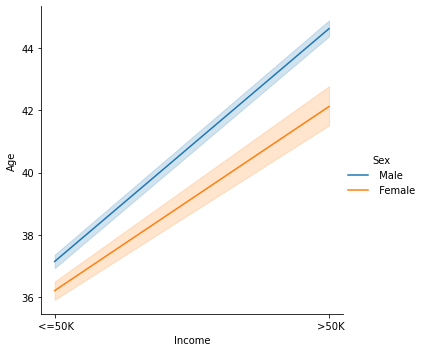

In [25]:
sns.relplot(x='Income',y='Age',hue='Sex',data=df,kind='line')

For lower age income is <=50k and for higher age income is >50k. At the same time age is less for female and more for male..

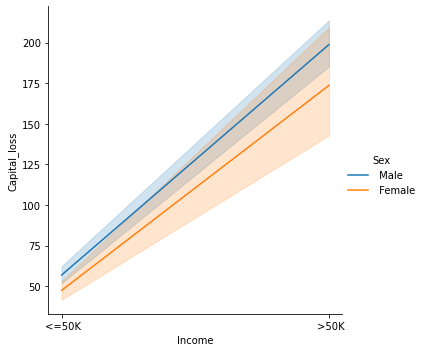

In [26]:
sns.relplot(x='Income',y='Capital_loss',hue='Sex',data=df,kind='line')

For income <=50k income capital loss is less and for >50k group capital loss is high, there is less difference in loss of male and female however here also females are in lower range.

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

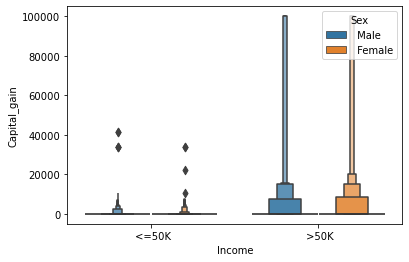

In [27]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Sex',data=df)

capital gain is less for income <=50k and capital gain is higher for income >50k , now its almost the same for both the sex.

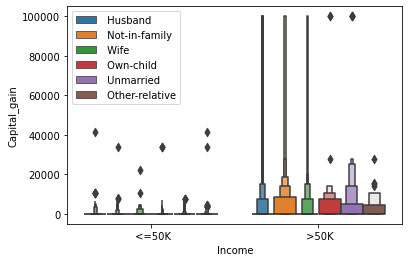

In [28]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Relationship',data=df)
plt.legend(loc='upper left')

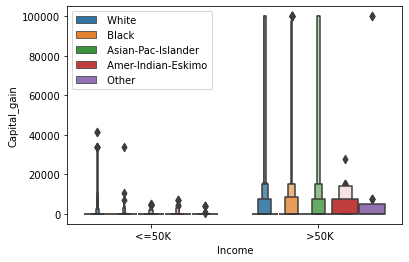

In [29]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Race',data=df)
plt.legend(loc='upper left')

White race people has more capital gain in both the category of income. Black stands second for income <=50k income. For income category >50k only Amer-Indian-Eskimo race has lower capital gain.

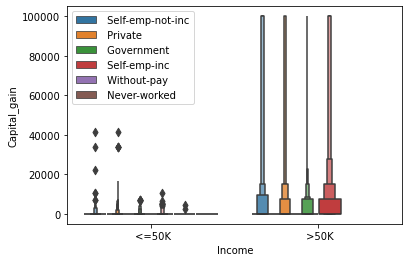

In [30]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Workclass',data=df)
plt.legend(loc='upper left')

Workclass Self-emp-not-inc and private are with high capital gain in both category of income. Self-emp-inc workclass also has good capital gain in more than 50k category. Never-worked worked has not gain any capital.

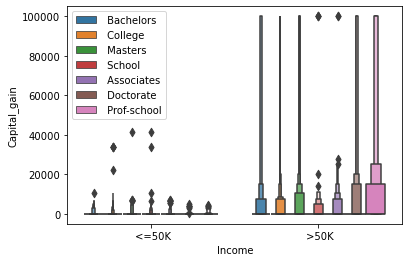

In [31]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Education',data=df)
plt.legend(loc='upper left')

For less than 50k category, people with education as masters and school has gain more capital than other type of education. For more than 50k category, people with educational background as bachelors, masters, school, Doctorate and prof-school has gain more capital.

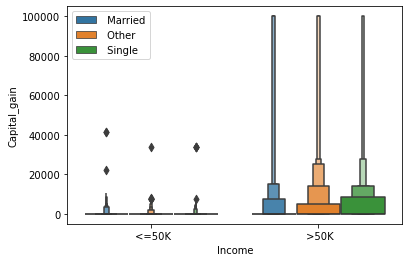

In [32]:
sns.boxenplot(x='Income',y='Capital_gain',hue='Marital_status',data=df)
plt.legend(loc='upper left')

Married people has gain high capital in type less than 50k. For >50k income, all three category of income has gain good capital.

# Let's do Encoding:

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4.0,83311,1.0,0.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,2.0,215646,2.0,1.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,2.0,234721,2.0,0.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,2.0,338409,1.0,0.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,2.0,284582,4.0,0.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2.0,257302,0.0,0.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,2.0,154374,2.0,0.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,2.0,151910,2.0,1.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,2.0,201490,2.0,2.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


After performing label encoder technique data is converted in numrical type. Let us check the datatype.

In [35]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

now we have not any categorical types in our data sets.

# Let's Describe our datasets:

In [36]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.924232,1.897818e+05,2.181665,0.854576,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,0.937660,1.055498e+05,1.454538,0.883426,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178315e+05,2.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.783630e+05,2.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,2.000000,2.370545e+05,2.000000,2.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,5.000000,1.484705e+06,6.000000,2.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Lets see its with visualization

<AxesSubplot:>

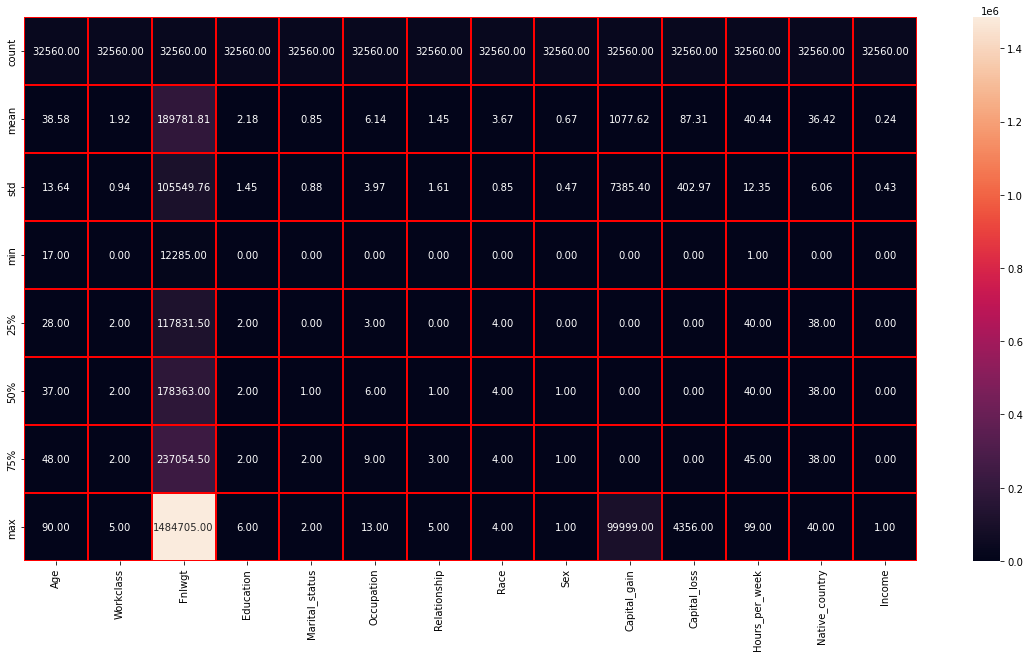

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [38]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.043447,-0.076646,0.111650,-0.463876,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.043447,1.000000,-0.018734,0.031373,-0.066916,-0.003993,-0.072772,0.071763,0.105533,0.047029,0.007292,0.076716,-0.018406,-0.001372
Fnlwgt,-0.076646,-0.018734,1.000000,0.025604,0.034188,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,0.111650,0.031373,0.025604,1.000000,-0.037761,0.042055,-0.021990,-0.012699,0.045045,0.037159,0.005783,-0.022509,-0.120991,-0.039528
Marital_status,-0.463876,-0.066916,0.034188,-0.037761,1.000000,0.002152,0.442036,-0.075372,-0.329357,-0.082806,-0.076371,-0.224407,0.019007,-0.415057
Occupation,0.001740,-0.003993,0.000138,0.042055,0.002152,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.072772,0.008922,-0.021990,0.442036,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.071763,-0.021278,-0.012699,-0.075372,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.105533,0.026882,0.045045,-0.329357,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995
Capital_gain,0.077674,0.047029,0.000437,0.037159,-0.082806,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.008818,0.223333


<AxesSubplot:>

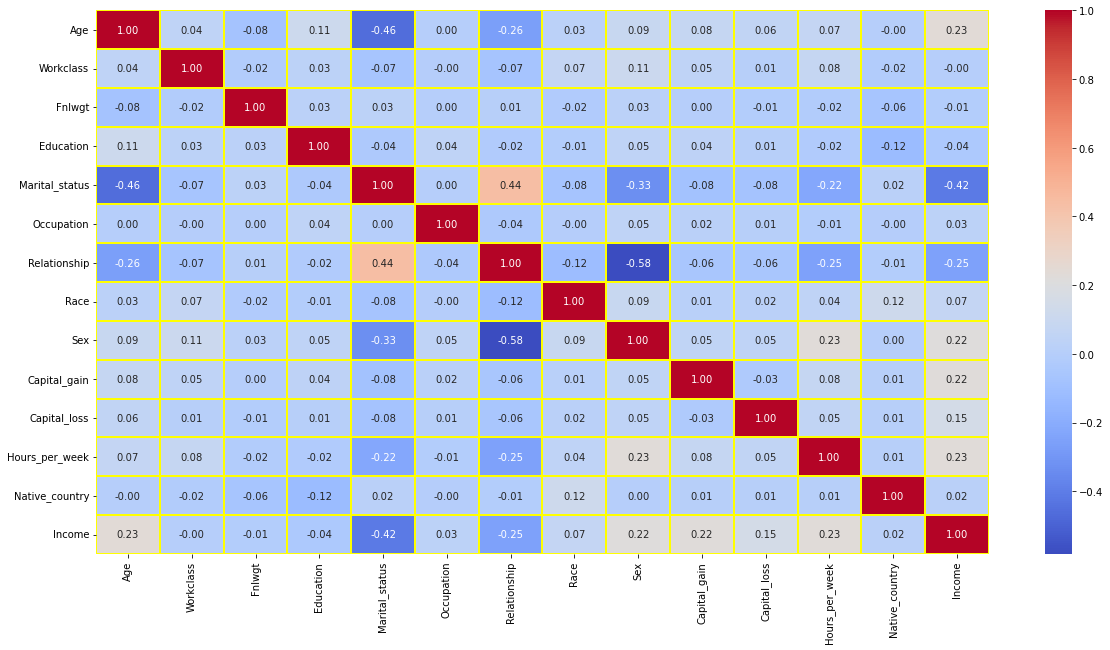

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

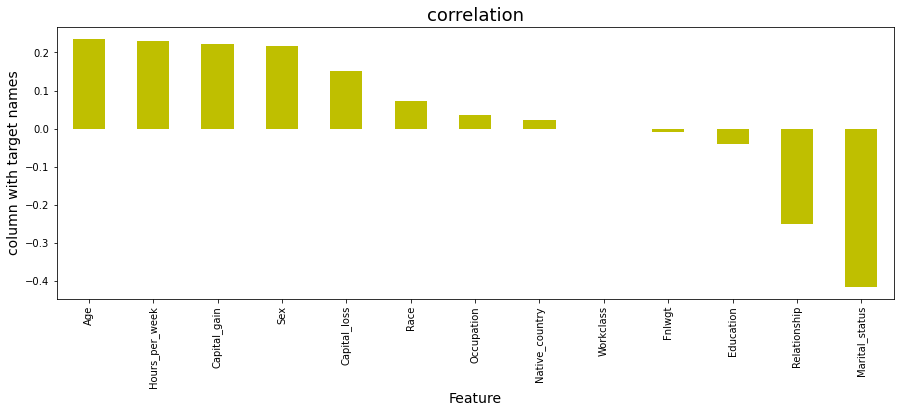

In [40]:
plt.figure(figsize=(15,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

maximun columns are high correlation with the target column("Income")

<Figure size 1440x720 with 0 Axes>

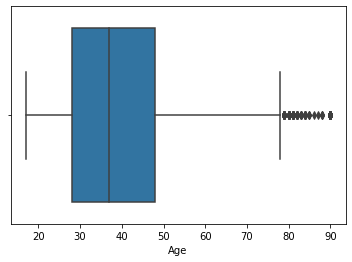

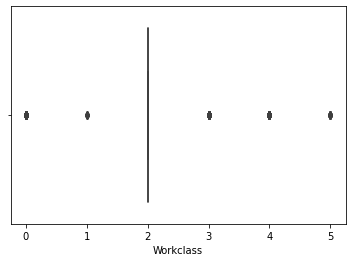

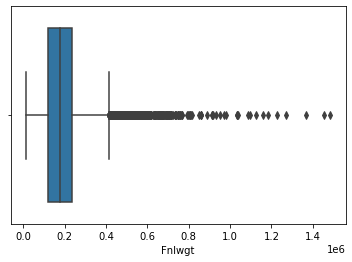

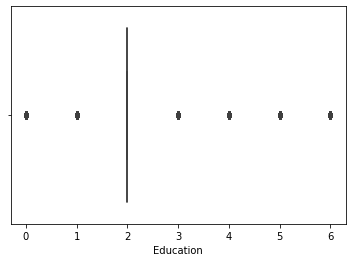

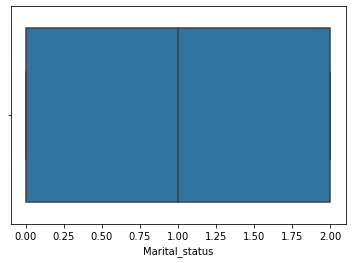

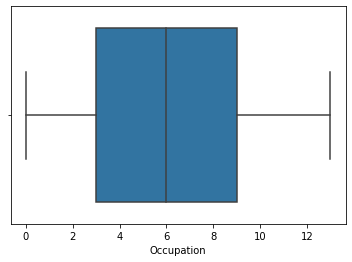

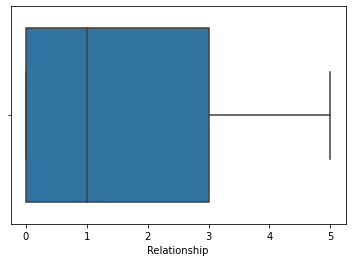

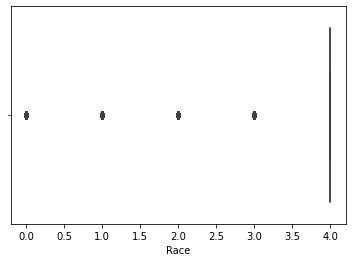

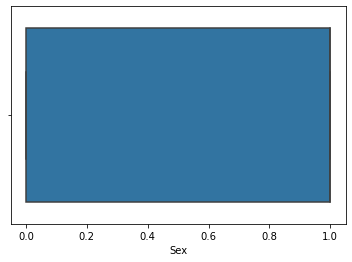

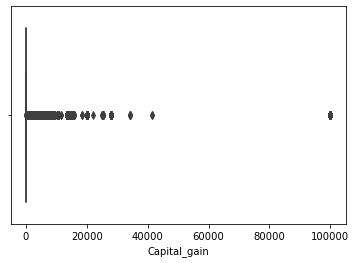

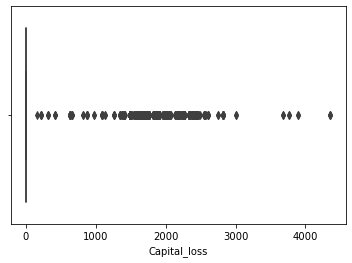

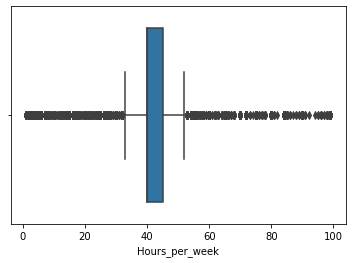

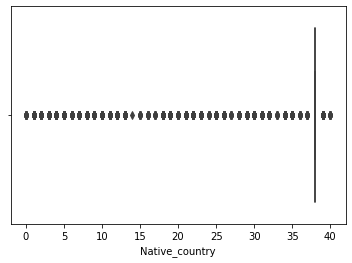

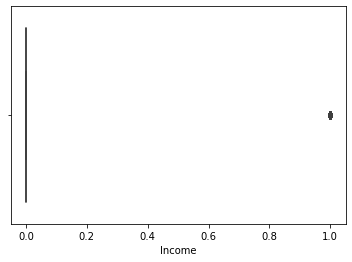

In [41]:
plt.figure(figsize=(20,10))
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])

outliers present in our data sets

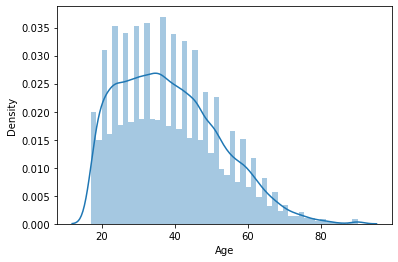

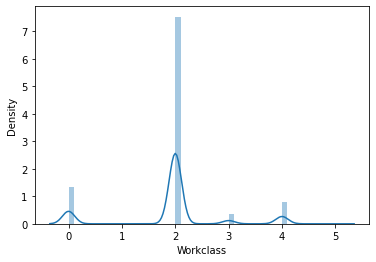

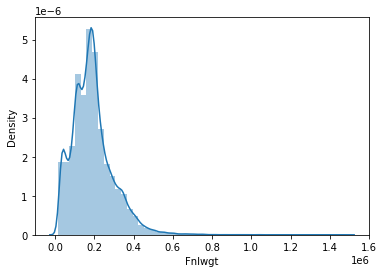

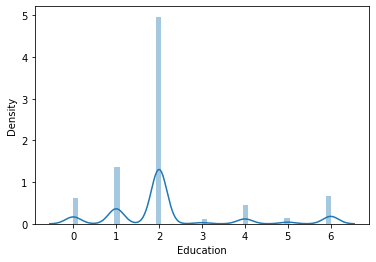

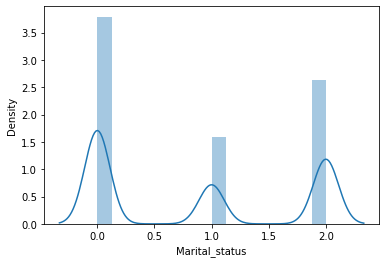

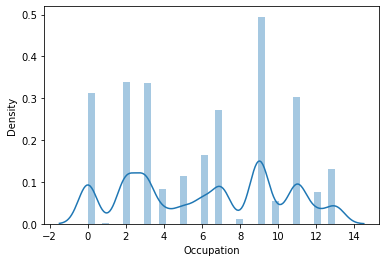

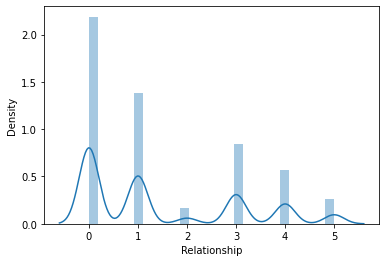

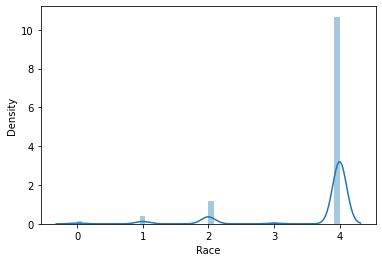

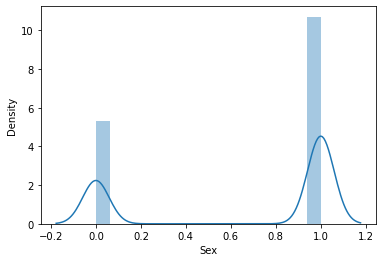

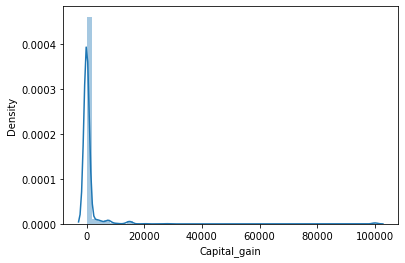

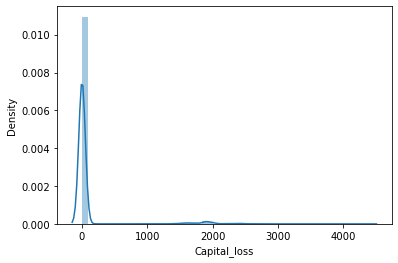

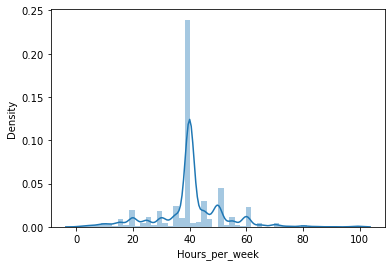

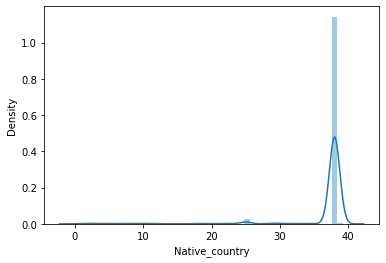

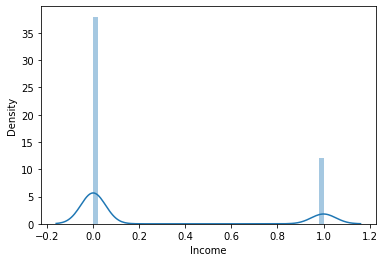

In [42]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],kde=True)

skewness has present in our data sets

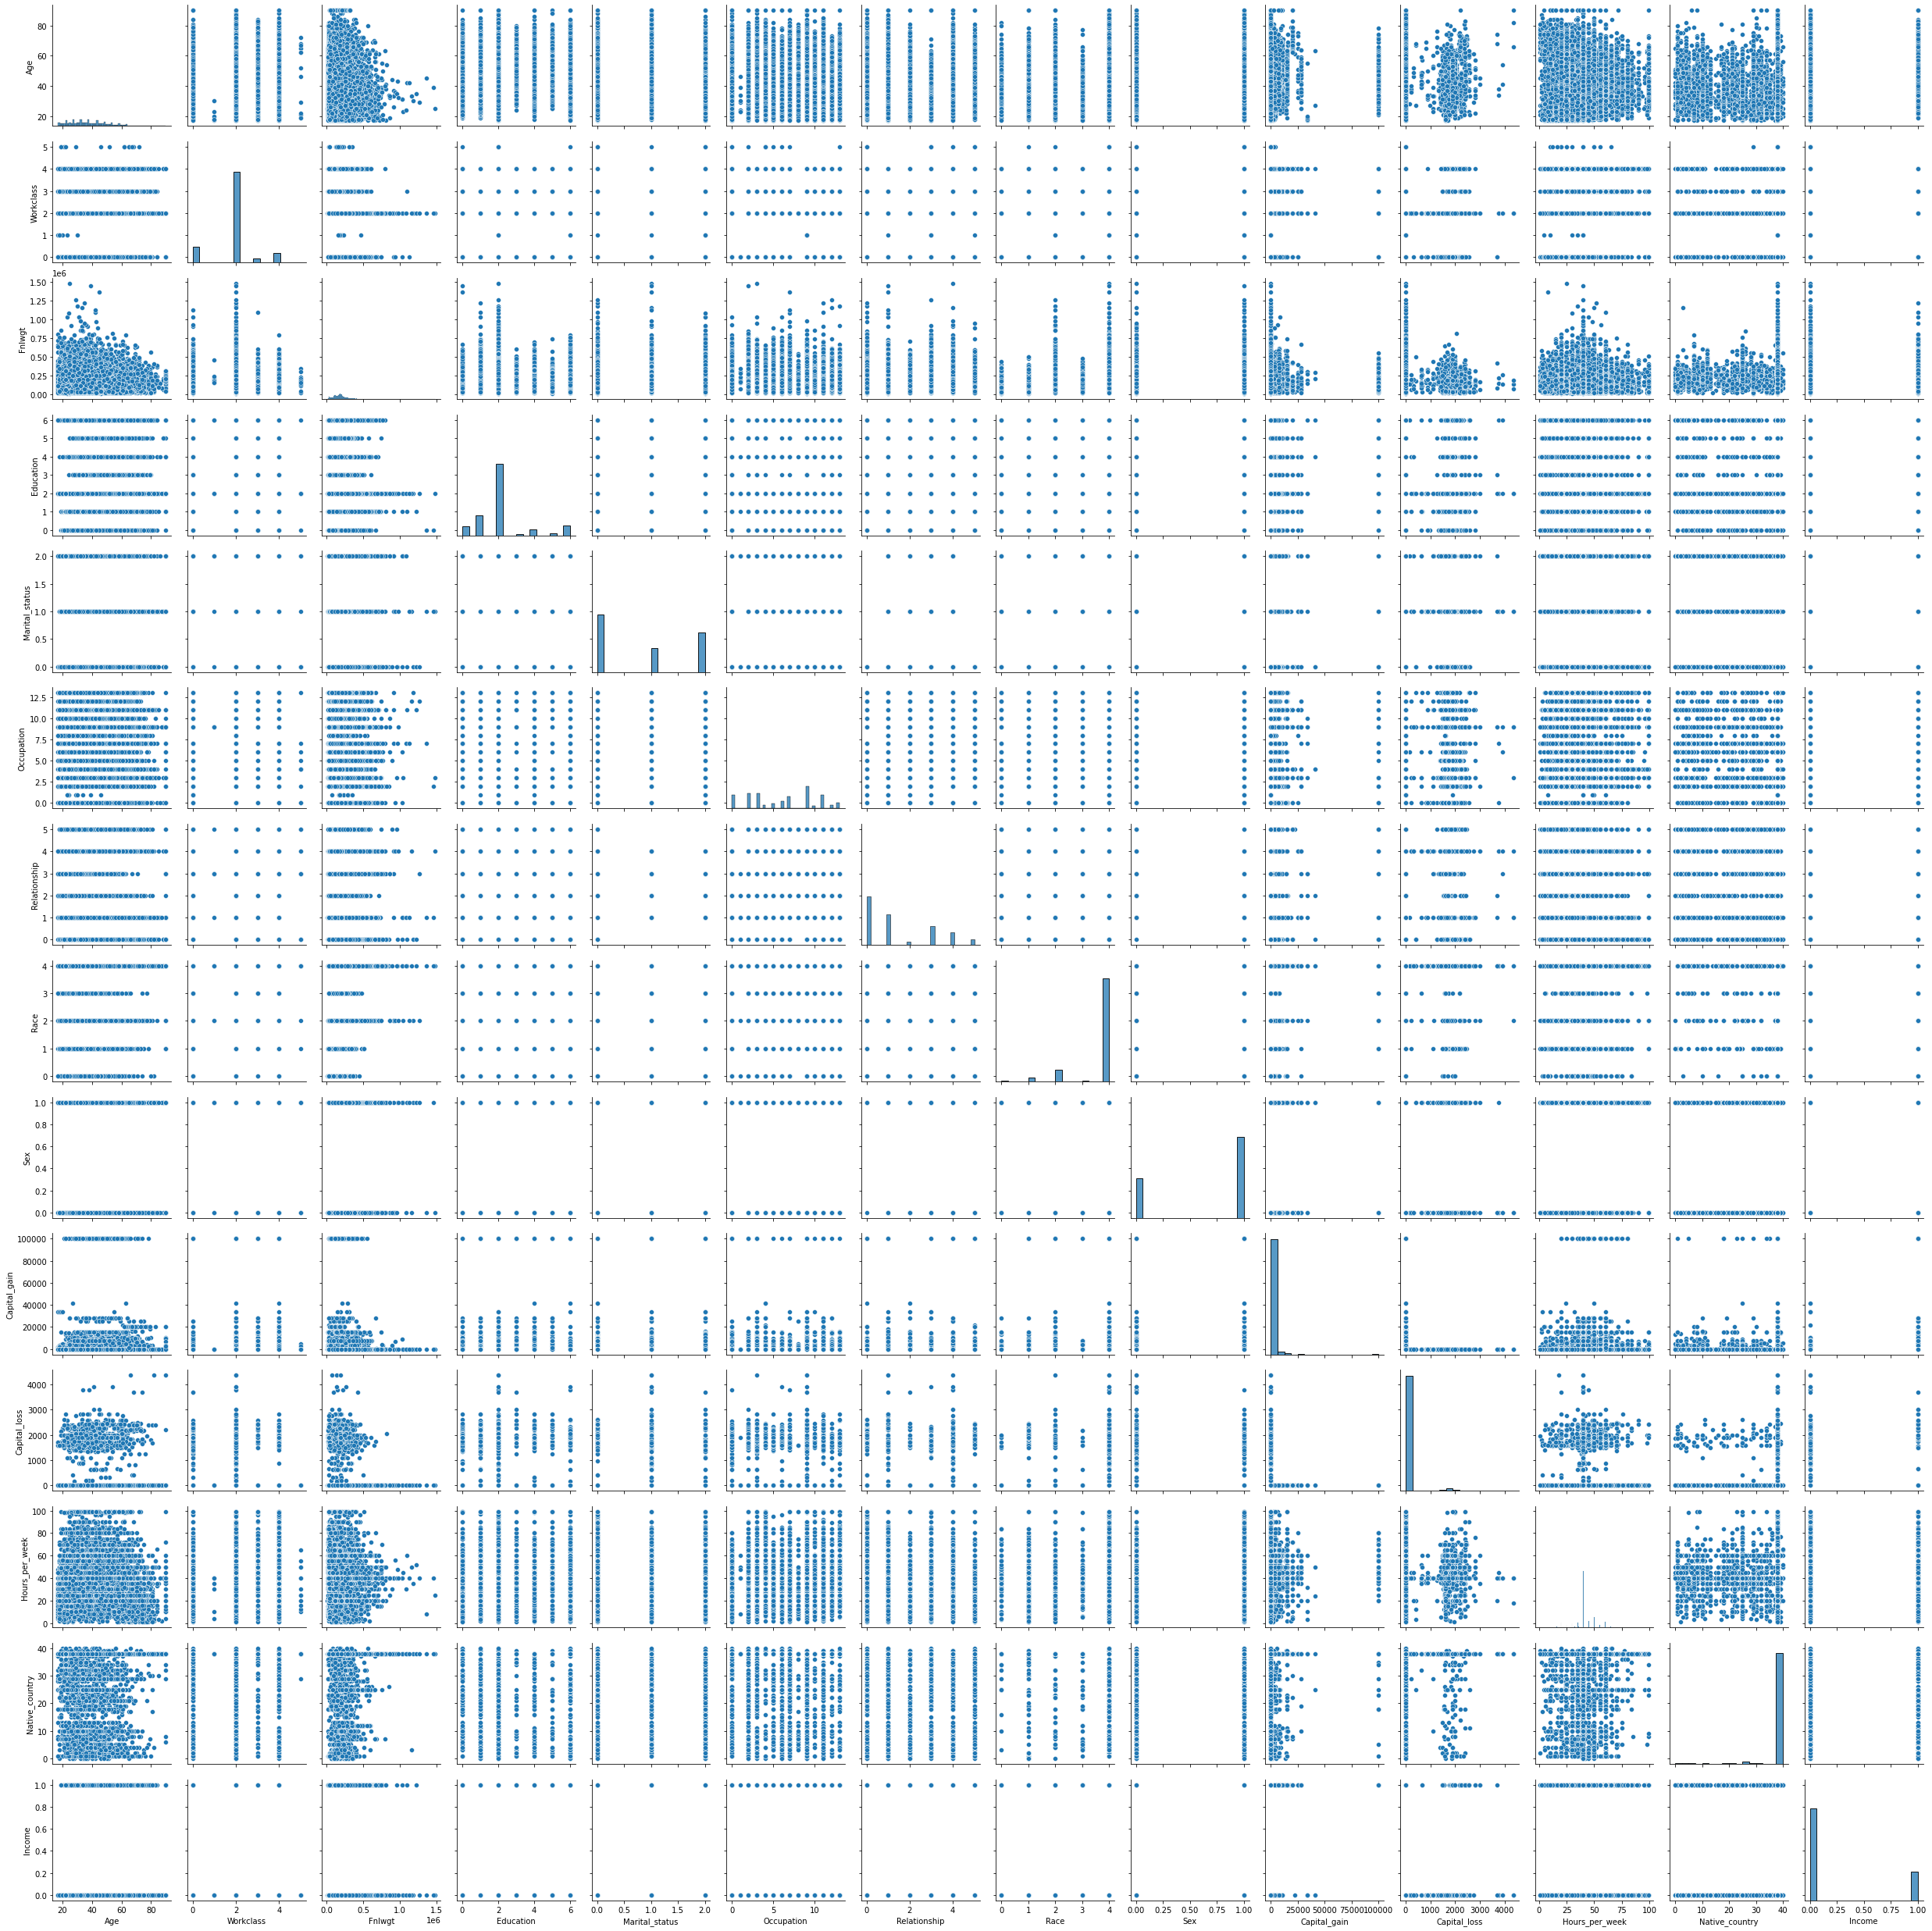

In [43]:
sns.pairplot(df)

Above pairplot shows that relation between each and every column of our dataset.

# Skewness and outliers removal:

In [44]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([12, 11,  7, ...,  7,  7,  7], dtype=int64))

In [45]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4.0,83311,1.0,0.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,2.0,215646,2.0,1.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,2.0,234721,2.0,0.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,37,2.0,284582,4.0,0.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
5,49,2.0,160187,6.0,0.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2.0,257302,0.0,0.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,2.0,154374,2.0,0.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,2.0,151910,2.0,1.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,2.0,201490,2.0,2.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


now removing all outliers

In [46]:
df_new.shape

(27917, 14)

In [47]:
df.shape

(32560, 14)

In [48]:
#Percentage data loss:
loss_percent=(32560-30816)/32560*100
print(loss_percent)

5.356265356265356


In [49]:
x=df_new.drop('Income', axis=1)
y=df_new['Income']
print(x.shape)
print(y.shape)

(27917, 13)
(27917,)


x stands for features column and y stands for target columns.

In [50]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [51]:
df_new.skew()

Age               -0.018341
Workclass          0.110021
Fnlwgt            -0.034477
Education          0.025738
Marital_status     0.047559
Occupation        -0.234954
Relationship       0.110379
Race              -2.520194
Sex               -0.692095
Capital_gain       3.077163
Capital_loss      24.848456
Hours_per_week     0.105637
Native_country     1.328331
dtype: float64

skewness almost remove

# Let's perform scaling now:

In [52]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
mns.fit_transform(df_new)

array([[0.66858723, 1.        , 0.24774944, ..., 0.        , 0.0800585 ,
        0.18197072],
       [0.48385253, 0.46015093, 0.552413  , ..., 0.        , 0.41426438,
        0.18197072],
       [0.70914851, 0.46015093, 0.58810418, ..., 0.        , 0.41426438,
        0.18197072],
       ...,
       [0.7728427 , 0.46015093, 0.42132479, ..., 0.        , 0.41426438,
        0.18197072],
       [0.14596145, 0.46015093, 0.52499761, ..., 0.        , 0.15591072,
        0.18197072],
       [0.69583675, 0.72251798, 0.68129206, ..., 0.        , 0.41426438,
        0.18197072]])

In [53]:
x=df_new

# class imbalancement:

In [54]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [55]:
y.value_counts()

0.0    21687
1.0    21687
Name: Income, dtype: int64

now our target columns is balanced

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8697406340057637  on Random State  60


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [59]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.8689337175792508
[[3748  577]
 [ 560 3790]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4325
         1.0       0.87      0.87      0.87      4350

    accuracy                           0.87      8675
   macro avg       0.87      0.87      0.87      8675
weighted avg       0.87      0.87      0.87      8675



Accuracy Score of SVC() is: 0.8156772334293948
[[3193 1132]
 [ 467 3883]]
              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80      4325
         1.0       0.77      0.89      0.83      4350

    accuracy                           0.82      8675
   macro avg       0.82      0.82      0.81      8675
weighted avg       0.82      0.82      0.81      8675



Accuracy Score of AdaBoostClassifier() is: 0.8590201729106628
[[3612  713]
 [ 510 3840]]
              precision    recall  f1-score   support

         0.0       0.88      0.

Accuracy for DecisionTreeClassifier is 86.89%, for SVC its 81.56% and for AdaBoostClassifier its 85.90% and for RandomForestClassifier its 90.63% and for Logisticregressionis 78.91%

# Cross Validation:

In [60]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.8543834241786545
Score for  SVC()  is :  0.8086874165663858
Score for  AdaBoostClassifier()  is :  0.8468441126185182
Score for  RandomForestClassifier()  is :  0.9009781605766081
Score for  LogisticRegression()  is :  0.7793840919798078


With RandomForestClassifier model there is very less difference in accuracy and cross validation score, Hence the best model is RandomForestClassifier.

# AUC-ROC CURVE:

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [62]:
model=[DecisionTreeClassifier(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression(),SVC(probability=True)]
for m in model:
    m.fit(x_train,y_train)
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of DecisionTreeClassifier()
0.8675463424357185


AUC Score of AdaBoostClassifier()
0.8589515646800878


AUC Score of RandomForestClassifier()
0.9087828051292273


AUC Score of LogisticRegression()
0.788998737625407


AUC Score of SVC(probability=True)
0.8154547870573383




as we can see that the AUC score of RandomForestClassifier is best. now we are Plotting roc_auc curve with the help of TPR(TRUE POSITIVE RATE) & FPR(FALSE POSITIVE RATE)

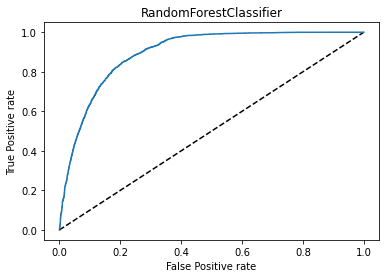

In [63]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandomForestClassifier')
plt.show()

# Hyperparameter Training:

In [64]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,3,4]}

In [75]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [77]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 2}

In [78]:
Final_mod= RandomForestClassifier(criterion="gini",max_depth=9,max_features="auto",min_samples_split=2)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.69452449567724


After hyperparamete tuning,we are getting best accuracy 85.69

# Saving the best Model:

In [79]:
import pickle
filename= 'census_prediction.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [80]:
#load the model from the disk

loaded_model = pickle.load(open('census_prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8569452449567724


In [81]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Orginal,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#end